## 1.0 Importing Packages

In [14]:
import pickle
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

from tensorflow import keras
from keras.preprocessing.text import Tokenizer
from keras.utils import pad_sequences

## 2.0 Reading Data

In [27]:
X_train = pd.read_csv("../inputs/X_train.csv")
X_train = X_train["clean_text"]

X_test = pd.read_csv("../inputs/X_test.csv")
X_test = X_test["clean_text"]

y_train = pd.read_csv("../inputs/y_train.csv")
y_train = y_train.iloc[:, 1:]

y_test = pd.read_csv("../inputs/y_test.csv")
y_test = y_test.iloc[:, 1:]

In [28]:
print(f"X_train shape: {X_train.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_test shape: {y_test.shape}")

X_train shape: (1780,)
y_train shape: (1780, 5)
X_test shape: (445,)
y_test shape: (445, 5)


## 5.0 Preparing Data

In [29]:
max_vocab = 2000
maxlen = 256

In [30]:
tokenizer = Tokenizer(num_words=max_vocab)
tokenizer.fit_on_texts(X_train)

In [31]:
X_train_vectors = tokenizer.texts_to_sequences(X_train)
X_train_vectors = pad_sequences(X_train_vectors, maxlen=maxlen, padding='post', truncating='post')

In [32]:
with open('../tokenizers/gru_tokenizer.pickle', 'wb') as handle:
    pickle.dump(tokenizer, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [33]:
X_test_vectors = tokenizer.texts_to_sequences(X_test)
X_test_vectors = pad_sequences(X_test_vectors, maxlen=maxlen, padding='post', truncating='post')

## 6.0 Model Building

In [38]:
model = keras.Sequential([
    keras.layers.Embedding(
        max_vocab, 16, input_length=maxlen),
    keras.layers.Dropout(0.1),
    keras.layers.Conv1D(64, 5, activation='relu'),
    keras.layers.MaxPooling1D(pool_size=4),
    keras.layers.GRU(64),
    keras.layers.Dense(5, activation='softmax')
])

In [39]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_3 (Embedding)     (None, 256, 16)           32000     
                                                                 
 dropout_3 (Dropout)         (None, 256, 16)           0         
                                                                 
 conv1d_3 (Conv1D)           (None, 252, 64)           5184      
                                                                 
 max_pooling1d_3 (MaxPooling  (None, 63, 64)           0         
 1D)                                                             
                                                                 
 gru_3 (GRU)                 (None, 64)                24960     
                                                                 
 dense_3 (Dense)             (None, 5)                 325       
                                                      

## 7.0 Model Compiling

In [40]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

## 8.0 Model Training

In [41]:
batch_size = 32
epochs = 20
history = model.fit(X_train_vectors, y_train, batch_size=batch_size, epochs=epochs, validation_data=(X_test_vectors, y_test))

Epoch 1/20
56/56 [==============================] - 4s 38ms/step - loss: 1.5625 - accuracy: 0.2646 - val_loss: 1.4881 - val_accuracy: 0.2742
Epoch 2/20
56/56 [==============================] - 2s 28ms/step - loss: 1.3188 - accuracy: 0.3511 - val_loss: 1.1816 - val_accuracy: 0.4135
Epoch 3/20
56/56 [==============================] - 2s 27ms/step - loss: 1.1012 - accuracy: 0.4298 - val_loss: 1.0553 - val_accuracy: 0.4360
Epoch 4/20
56/56 [==============================] - 2s 28ms/step - loss: 1.0128 - accuracy: 0.4596 - val_loss: 1.0369 - val_accuracy: 0.4202
Epoch 5/20
56/56 [==============================] - 2s 27ms/step - loss: 0.9794 - accuracy: 0.4607 - val_loss: 1.0526 - val_accuracy: 0.4112
Epoch 6/20
56/56 [==============================] - 1s 26ms/step - loss: 0.9501 - accuracy: 0.4848 - val_loss: 1.0004 - val_accuracy: 0.5236
Epoch 7/20
56/56 [==============================] - 2s 28ms/step - loss: 0.8778 - accuracy: 0.5848 - val_loss: 0.9109 - val_accuracy: 0.5640
Epoch 8/20
56

## 9.0 Model's Performance Plotting

### 9.1 Plotting Loss vs. Validation Loss

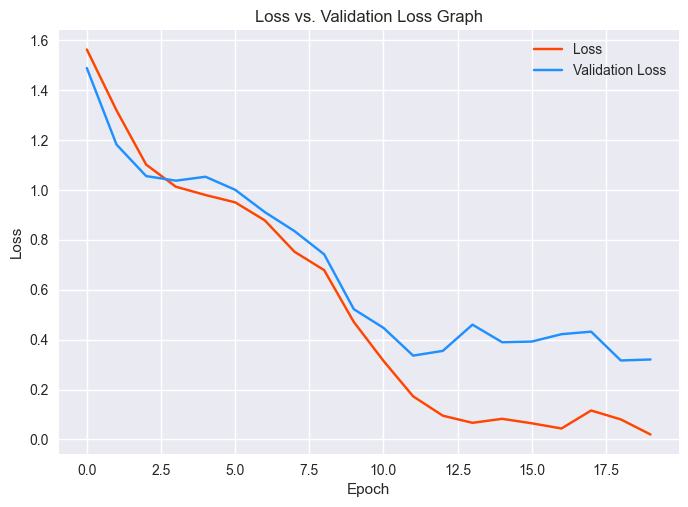

In [42]:
plt.style.use(['seaborn'])
plt.title("Loss vs. Validation Loss Graph")
plt.plot(history.history["loss"], color="orangered", label="Loss")
plt.plot(history.history["val_loss"], color="dodgerblue", label="Validation Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.show()

### 9.2 Plotting Accuracy vs. Validation Accuracy

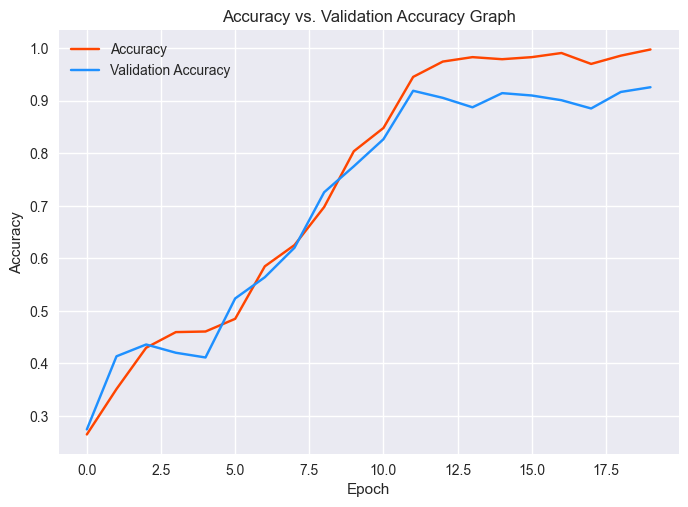

In [43]:
plt.title("Accuracy vs. Validation Accuracy Graph")
plt.plot(history.history["accuracy"], color="orangered", label="Accuracy")
plt.plot(history.history["val_accuracy"], color="dodgerblue", label="Validation Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

### 9.3 Plotting Classification Report  

In [44]:
predictions = model.predict(X_test_vectors)
preds = np.where(predictions > 0.5, 1, 0)

14/14 [==============================] - 1s 8ms/step


In [45]:
cls_report = classification_report(y_test, preds)
print(cls_report)

              precision    recall  f1-score   support

           0       0.93      0.84      0.89       102
           1       0.87      0.95      0.91        77
           2       0.96      0.92      0.94        84
           3       0.97      0.94      0.96       102
           4       0.89      0.99      0.93        80

   micro avg       0.93      0.92      0.92       445
   macro avg       0.92      0.93      0.92       445
weighted avg       0.93      0.92      0.92       445
 samples avg       0.92      0.92      0.92       445



C:\Users\as\AppData\Roaming\Python\Python310\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### 9.4 Plotting Confusion Matrix

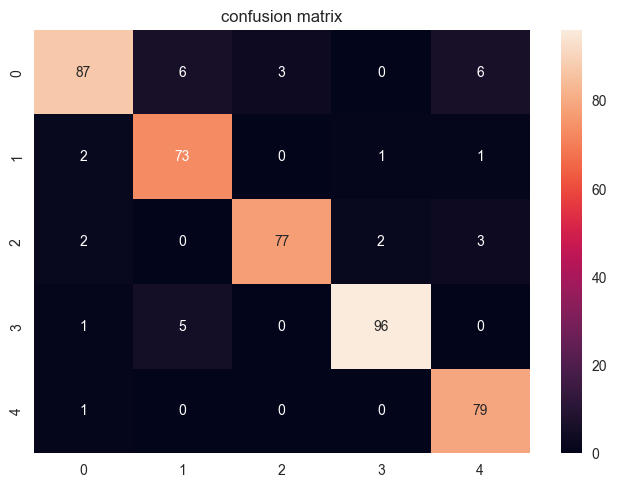

In [56]:
y_test_vector = np.argmax(y_test.values, axis=1)
y_pred_vector = np.argmax(preds, axis=1)
conf_matrix = confusion_matrix(y_test_vector, y_pred_vector)
sn.heatmap(conf_matrix, annot=True)
plt.title("confusion matrix")
plt.show()

## 10.0 Model Evaluation

In [57]:
loss_and_accuracy = model.evaluate(X_test_vectors, y_test)
print(f"loss: {loss_and_accuracy[0]:.4f}")
print(f"accuracy: {loss_and_accuracy[1]:.4f}")

14/14 [==============================] - 0s 8ms/step - loss: 0.3205 - accuracy: 0.9258
loss: 0.3205
accuracy: 0.9258


## 11.0 Model Saving

In [58]:
model.save("../models/BBC-Classifier-GRU.h5")